In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# Plot interactivity
#% matplotlib notebook

In [2]:
# Clean data contains every "stop" for a year for the IC, IR and RE trains operated by SBB
data = pd.read_pickle('data_clean_201807-201906.pkl')

In [3]:
data = data.reset_index()

In [4]:
# How much data in MB
data.memory_usage().sum()/10e6

49.986614

In [5]:
data.head()

,index,BETRIEBSTAG,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,DELAY_AN,DELAY_AB
0,351,01.07.2018,IC3,IC,True,False,Basel SBB,NaN,NaN,PROGNOSE,01.07.2018 08:07,01.07.2018 08:08:27,REAL,False,NaT,00:01:27
1,352,01.07.2018,IC3,IC,True,False,Zürich HB,01.07.2018 09:04,01.07.2018 09:04:27,REAL,NaN,NaN,PROGNOSE,False,00:00:27,NaT
2,375,01.07.2018,IC,IC,True,False,Lugano,NaN,NaN,PROGNOSE,01.07.2018 16:36,01.07.2018 16:39:48,REAL,False,NaT,00:03:48
3,376,01.07.2018,IC,IC,True,False,Bellinzona,01.07.2018 17:07,01.07.2018 17:05:08,REAL,01.07.2018 17:10,01.07.2018 17:11:00,REAL,False,-1 days +23:58:08,00:01:00
4,377,01.07.2018,IC,IC,True,False,Arth-Goldau,01.07.2018 18:09,01.07.2018 18:09:00,REAL,01.07.2018 18:11,01.07.2018 18:13:00,REAL,False,00:00:00,00:02:00


In [6]:
data['AN_PROGNOSE_STATUS'].value_counts()

REAL         3496722
PROGNOSE      887247
UNBEKANNT        821
Name: AN_PROGNOSE_STATUS, dtype: int64

In [7]:
data.groupby(['AN_PROGNOSE_STATUS','VERKEHRSMITTEL_TEXT']).size()/len(data)*100

AN_PROGNOSE_STATUS  VERKEHRSMITTEL_TEXT
PROGNOSE            IC                      5.075089
                    IR                      6.122460
                    RE                      9.037103
REAL                IC                     20.234310
                    IR                     31.042239
                    RE                     28.470075
UNBEKANNT           IC                      0.005109
                    IR                      0.002007
                    RE                      0.011608
dtype: float64

In [8]:
# Get arrival and departure delay in seconds
data['DELAY_DEP_SEC'] = data['DELAY_AB'].dt.total_seconds()
data['DELAY_ARR_SEC'] = data['DELAY_AN'].dt.total_seconds()

In [9]:
data['DURCHFAHRT_TF'].value_counts()

False    4384432
True         358
Name: DURCHFAHRT_TF, dtype: int64

In [10]:
# Trains stops - Percentage by Haltestelle
data['FAELLT_AUS_TF'].value_counts(1)*100

False    96.644537
True      3.355463
Name: FAELLT_AUS_TF, dtype: float64

In [11]:
# Trains stops - Percentage by Haltestelle
haltestelle_frequency = data['HALTESTELLEN_NAME'].value_counts(1)*100

In [12]:
# Trains that are late < 3 minutes - Percentage by Haltestelle
data['HALTESTELLEN_NAME'][data['DELAY_ARR_SEC']>180].value_counts(1)*100

Zürich HB               4.592584
Olten                   4.183356
Bern                    3.819032
Basel SBB               2.355865
Lausanne                2.294378
Spiez                   2.162732
Genève                  2.012461
Morges                  1.751208
Thun                    1.722123
Visp                    1.698907
Solothurn               1.671608
Nyon                    1.642268
Aarau                   1.548125
Yverdon-les-Bains       1.452452
Liestal                 1.414948
Vevey                   1.355758
Zürich Flughafen        1.305752
Aigle                   1.264421
Sion                    1.223090
Biel/Bienne             1.203956
Brig                    1.203956
Winterthur              1.202170
Baden                   1.186862
Gland                   1.180739
Neuchâtel               1.155226
Luzern                  1.144510
Mendrisio               1.144000
Sierre/Siders           1.117977
Fribourg/Freiburg       1.110068
Montreux                1.109303
          

In [13]:
data['ABFAHRTSZEIT'] = pd.to_datetime(data['ABFAHRTSZEIT'],format="%d.%m.%Y %H:%M")
data['ANKUNFTSZEIT'] = pd.to_datetime(data['ANKUNFTSZEIT'],format="%d.%m.%Y %H:%M")

In [14]:
data['BETRIEBSTAG'] = pd.to_datetime(data['BETRIEBSTAG'],format="%d.%m.%Y")

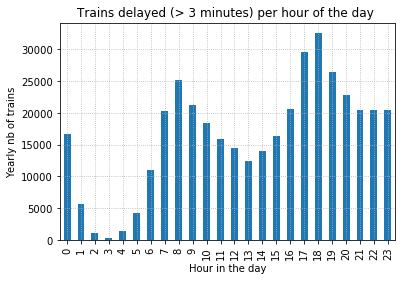

In [23]:
# Trains that are late < 3 minutes - Percentage by hour
ax1 = data['ANKUNFTSZEIT'][data['DELAY_ARR_SEC']>180].dt.hour.value_counts().sort_index().plot(kind='bar')
ax1.grid(linestyle=':')
ax1.set(xlabel='Hour in the day',title='Trains delayed (> 3 minutes) per hour of the day ',ylabel='Yearly nb of trains')

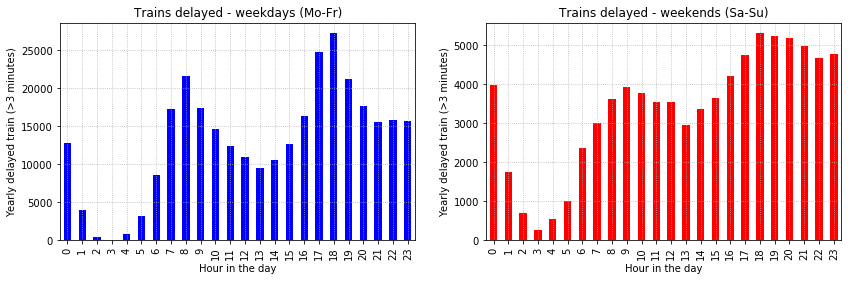

In [81]:
# Trains that are late < 3 minutes - Absolut number by hour
plt.subplot(1,2,1)
ax1 = data['ANKUNFTSZEIT'][(data['DELAY_ARR_SEC']>180) & (data['BETRIEBSTAG'].dt.weekday.isin([0,1,2,3,4]))].dt.hour.value_counts().sort_index().plot(kind='bar',color='blue')
ax1.grid(linestyle=':')
ax1.set(xlabel='Hour in the day',title='Trains delayed - weekdays (Mo-Fr)',ylabel='Yearly delayed train (>3 minutes)')
plt.subplot(1,2,2)
ax1 = data['ANKUNFTSZEIT'][(data['DELAY_ARR_SEC']>180) & (data['BETRIEBSTAG'].dt.weekday.isin([5,6]))].dt.hour.value_counts().sort_index().plot(kind='bar',color='red')
ax1.grid(linestyle=':')
ax1.set(xlabel='Hour in the day',title='Trains delayed - weekends (Sa-Su)',ylabel='Yearly delayed train (>3 minutes)')
plt.rcParams["figure.figsize"] = (14, 4)

In [27]:
# Trains that are late < 3 minutes - Number by date
hour_nbtrainslate = data['BETRIEBSTAG'][data['DELAY_ARR_SEC']>180].dt.date.value_counts().sort_index()

# Trains - Number by date
hour_nbtrains = data['BETRIEBSTAG'].dt.date.value_counts().sort_index()

In [28]:
perc_trainslate = hour_nbtrainslate/hour_nbtrains*100

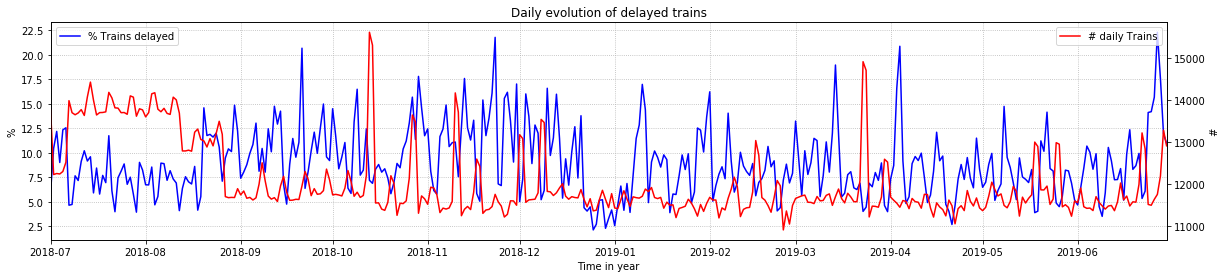

In [102]:
# Trains late by day - percentage and absolute number
ax1 = (perc_trainslate).plot(label='% Trains delayed',color='blue')
ax2 = hour_nbtrains.plot(secondary_y=True,color='red',label='# daily Trains',ax=ax1)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax1.grid(linestyle=':')
ax1.set(xlabel='Time in year',ylabel='%', title='Daily evolution of delayed trains')
ax2.set(ylabel='#')
plt.rcParams["figure.figsize"] = (20, 4)

In [157]:
print(perc_trainslate.sort_values(ascending=False).head(10))

2019-06-27    22.303567
2018-11-23    21.782431
2019-04-04    20.874126
2018-09-21    20.677824
2019-03-14    18.961683
2018-10-29    17.801186
2018-11-13    17.591292
2019-06-28    17.569342
2018-11-30    17.026462
2019-01-10    16.988549
Name: BETRIEBSTAG, dtype: float64


(-150, 3000)

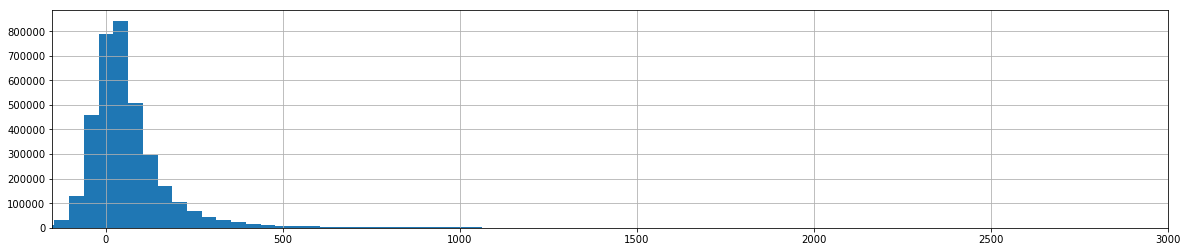

In [104]:
# Distribution of time delays (can be negative when trains arrive before scheduled time)
ax = data['DELAY_ARR_SEC'].hist(bins=600)
ax.set_xlim((-150,3000))

In [120]:
# Take top 20 stations by frequency
top20_stops = haltestelle_frequency[0:20].index
data_delays = pd.DataFrame(data[['HALTESTELLEN_NAME','DELAY_ARR_SEC']][data['HALTESTELLEN_NAME'].isin(top20_stops)])
data_delays['HALTESTELLEN_NAME'].unique()

array(['Basel SBB', 'Zürich HB', 'Luzern', 'Olten', 'Brig', 'Bern',
       'Baden', 'Brugg AG', 'Biel/Bienne', 'Lausanne', 'St. Gallen',
       'Zürich Flughafen', 'Winterthur', 'Morges', 'Genève',
       'Genève-Aéroport', 'Vevey', 'Nyon', 'Zürich Oerlikon', 'Aarau'], dtype=object)

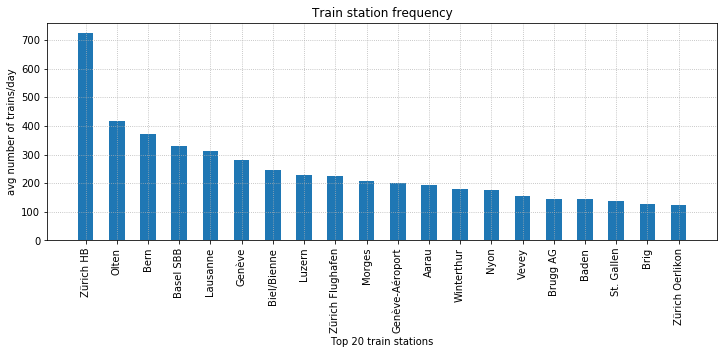

In [181]:
# Plot frequency of each train station
ax1 = (data_delays.groupby('HALTESTELLEN_NAME').count()/365)['all'].sort_values(ascending=False).plot(kind='bar', label='')
ax1.axis('tight')
ax1.grid(linestyle=':')
ax2.legend(['# train stops'],loc='lower right')
ax1.set(ylabel='avg number of trains/day',xlabel='Top 20 train stations')
ax2.set_ylabel('total in tousands/year')

plt.title('Train station frequency')
plt.rcParams["figure.figsize"] = (12, 4)

In [122]:
# data_delays contains delay time on arrival in seconds. Group delays by delays in minutes, as following : 
min_to_sec = 60
data_delays['all'] = 1
data_delays['03-05min'] = (data_delays['DELAY_ARR_SEC']>=3*min_to_sec) & (data_delays['DELAY_ARR_SEC']<5*min_to_sec)
data_delays['05-07min'] = (data_delays['DELAY_ARR_SEC']>=5*min_to_sec) & (data_delays['DELAY_ARR_SEC']<7*min_to_sec)
data_delays['07-10min'] = (data_delays['DELAY_ARR_SEC']>=7*min_to_sec) & (data_delays['DELAY_ARR_SEC']<10*min_to_sec)
data_delays['10-15min'] = (data_delays['DELAY_ARR_SEC']>=10*min_to_sec) & (data_delays['DELAY_ARR_SEC']<15*min_to_sec)
data_delays['15-20min'] = (data_delays['DELAY_ARR_SEC']>=15*min_to_sec) & (data_delays['DELAY_ARR_SEC']<20*min_to_sec)
data_delays['>20min'] = (data_delays['DELAY_ARR_SEC']>=20*min_to_sec)

In [123]:
data_delays.columns

Index(['HALTESTELLEN_NAME', 'DELAY_ARR_SEC', 'all', '03-05min', '05-07min',
       '07-10min', '10-15min', '15-20min', '>20min'],
      dtype='object')

In [124]:
df_pivot = pd.pivot_table(data_delays, index=['HALTESTELLEN_NAME'],values=['all','03-05min', '05-07min',
       '07-10min', '10-15min', '15-20min', '>20min'], aggfunc=np.sum)

In [135]:
# pivot data_delays to have as index the name of the top 20 stations
df_pivot = pd.pivot_table(data_delays, index=['HALTESTELLEN_NAME'],values=['all','03-05min', '05-07min',
       '07-10min', '10-15min', '15-20min', '>20min'], aggfunc=np.sum)
print(df_pivot.head())
# Transform df_pivot to have percentage instead in every column
df_pivot_perc = df_pivot.divide(df_pivot['all'],axis=0)*100
df_pivot_perc['>3min'] = df_pivot_perc.sum(axis=1)
df_pivot_perc = df_pivot_perc.sort_values(by='>3min', ascending=False)
df_pivot_perc = df_pivot_perc.drop(labels=['>3min'],axis=1)

                   03-05min  05-07min  07-10min  10-15min  15-20min  >20min  \
HALTESTELLEN_NAME                                                             
Aarau                3700.0     960.0     527.0     511.0     262.0   170.0   
Baden                3179.0     787.0     412.0     208.0      74.0    55.0   
Basel SBB            5203.0    1846.0     980.0     756.0     262.0   258.0   
Bern                 8995.0    2847.0    1482.0     901.0     466.0   412.0   
Biel/Bienne          2718.0     898.0     487.0     287.0     161.0   207.0   

                      all  
HALTESTELLEN_NAME          
Aarau               70433  
Baden               53134  
Basel SBB          119846  
Bern               135809  
Biel/Bienne         89722  


In [137]:
# pivot data_delays to have as index the name of the top 20 stations
df_pivot = pd.pivot_table(data_delays, index=['HALTESTELLEN_NAME'],values=['all','03-05min', '05-07min',
       '07-10min', '10-15min', '15-20min', '>20min'], aggfunc=np.sum)
print(df_pivot.head())

                   03-05min  05-07min  07-10min  10-15min  15-20min  >20min  \
HALTESTELLEN_NAME                                                             
Aarau                3700.0     960.0     527.0     511.0     262.0   170.0   
Baden                3179.0     787.0     412.0     208.0      74.0    55.0   
Basel SBB            5203.0    1846.0     980.0     756.0     262.0   258.0   
Bern                 8995.0    2847.0    1482.0     901.0     466.0   412.0   
Biel/Bienne          2718.0     898.0     487.0     287.0     161.0   207.0   

                      all  
HALTESTELLEN_NAME          
Aarau               70433  
Baden               53134  
Basel SBB          119846  
Bern               135809  
Biel/Bienne         89722  


In [138]:
# Transform df_pivot to have percentage instead in every column
df_pivot_perc = df_pivot.divide(df_pivot['all'],axis=0)*100
df_pivot_perc['>3min'] = df_pivot_perc.sum(axis=1)
df_pivot_perc = df_pivot_perc.sort_values(by='>3min', ascending=False)
df_pivot_perc = df_pivot_perc.drop(labels=['>3min'],axis=1)
# Remove "all" column, which contains the total number of trains per year for each station
df_pivot_perc = df_pivot_perc.drop(labels='all',axis=1)
df_pivot_perc['total'] = df_pivot['all']
print(df_pivot_perc.head())

                   03-05min  05-07min  07-10min  10-15min  15-20min    >20min  \
HALTESTELLEN_NAME                                                               
Bern               6.623272  2.096326  1.091238  0.663432  0.343129  0.303367   
Olten              6.949992  1.848172  0.909657  0.589605  0.309559  0.254468   
Brig               5.295773  2.118746  1.411770  0.877174  0.257479  0.394946   
Nyon               5.608974  2.148052  1.032421  0.607125  0.291235  0.306644   
Vevey              5.272109  2.161793  1.069500  0.540010  0.201627  0.150782   

                    total  
HALTESTELLEN_NAME          
Bern               135809  
Olten              152475  
Brig                45829  
Nyon                64896  
Vevey               57036  


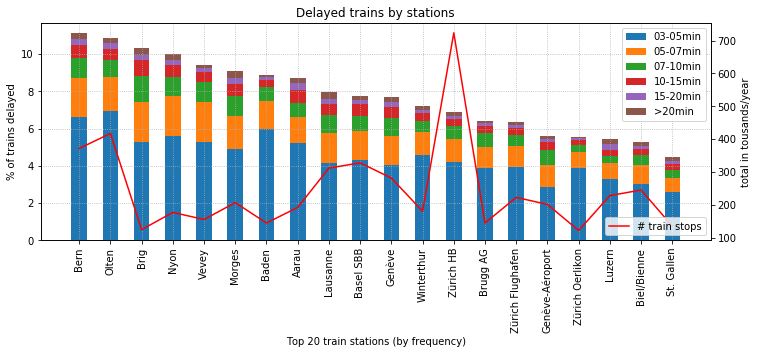

In [160]:
ax1 = df_pivot_perc.drop(labels=['total'],axis=1).plot(kind='bar',stacked=True)
ax2 = (df_pivot_perc['total']/365).plot(color= 'red',ax=ax1, secondary_y=True)
ax1.axis('tight')
ax1.grid(linestyle=':')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.legend(loc='upper right')
ax2.legend(['# train stops'],loc='lower right')
ax1.set(ylabel='% of trains delayed',xlabel='Top 20 train stations (by frequency)')
ax2.set_ylabel('total in tousands/year')

plt.title('Delayed trains by stations')
plt.rcParams["figure.figsize"] = (12, 4)

In [143]:
# Table with delays, sorted by total number of trains
df_pivot_perc.sort_values(by='total',ascending=False)

,03-05min,05-07min,07-10min,10-15min,15-20min,>20min,total
HALTESTELLEN_NAME,,,,,,,
Zürich HB,4.237163,1.231720,0.663962,0.363986,0.162866,0.226118,264021
Olten,6.949992,1.848172,0.909657,0.589605,0.309559,0.254468,152475
Bern,6.623272,2.096326,1.091238,0.663432,0.343129,0.303367,135809
Basel SBB,4.341405,1.540310,0.817716,0.630810,0.218614,0.215276,119846
Lausanne,4.158083,1.632374,0.939799,0.613674,0.260373,0.341028,114067
Genève,4.033237,1.600676,0.963900,0.545530,0.293150,0.282472,103019
Biel/Bienne,3.029357,1.000869,0.542788,0.319877,0.179443,0.230713,89722
Luzern,3.308555,0.830730,0.411774,0.299254,0.342347,0.231024,83541
Zürich Flughafen,3.937896,1.125814,0.596019,0.358102,0.155750,0.168014,81541
